### 全连接神经网络拟合非线性回归
#### 1.生成训练样本
#### (1)使用def f(x)自定义一个目标函数(y=x0.6+sinx），并加上干扰噪声（np.random.normal生成噪音），生成训练样本集和测试样本集。

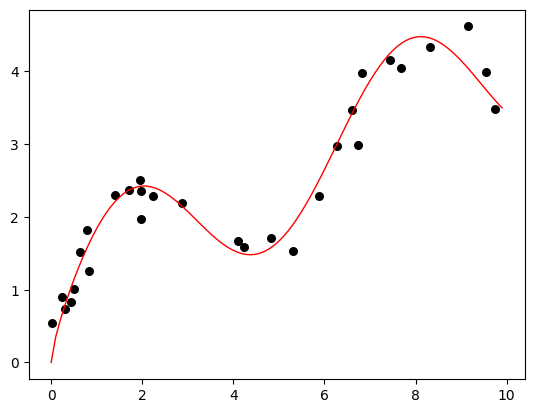

In [31]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1101) # 指定随机数种子，产生相同的随机数，便于观察试验结果

def f(x): # 目标函数
    return x**0.6 + np.sin(x)

def get_data(num, start, end): # 产生训练样本
    for _ in range(num):
        x = np.random.uniform(start, end)
        noise = np.random.normal(0, 0.3)
        y = f(x) + noise
        yield np.array([x]).astype(np.float32), np.array([y]).astype(np.float32)

start = 0.0 # 生成样本的区间起点
end = 10.0 # 生成样本的区间终点
data_number = 30 # 生成样本总数
repeat_size = 1 # 样本重复次数

train_data = list(get_data(data_number, start, end))  #生成30个样本训练集
x_train, y_train = zip(*train_data) #将样本数据中的输入特征 X 和对应的标签 y 分别解压缩成两个列表
plt.scatter(x_train, y_train, color="black", s=30)

x_test = np.arange(start, end, 0.1) # 生成100个样本测试集
y_test = f(x_test) # 测试样本的标签
plt.plot(x_test, y_test, color="red", linewidth=1, linestyle='-')
plt.show()

In [32]:
# 归一化训练样本标签值
miny = np.inf
maxy = -1 * np.inf
for i in range(len(train_data)): # tuple to list
    train_data[i] = list(train_data[i])
for data in train_data:
    if data[1] > maxy:
        maxy = data[1]
    if data[1] < miny:
        miny = data[1]
step = maxy - miny
for data in train_data:
    data[1] = ( data[1] - miny ) / step

In [35]:
y_train_s = np.array(y_train)
for i in range(len(y_train_s)): # 归一化训练样本标签值
    y_train_s[i] = ( y_train_s[i] - miny ) / step
#这种归一化处理有助于训练神经网络模型时加快收敛速度，使模型更加稳定地学习数据的分布

In [36]:
# 将数组 y1 和 X 转换为一维数组
y_train_s = y_train_s.reshape(-1)
x_train = np.array(x_train)
x_train = x_train.reshape(-1)

！！！新版本变化：TensorFlow2.0.0版本下的代码不能正常运行，报错ModuleNotFoundError: No module named 'keras'

#### 2.构建多层全连接神经网络，并配置模型
#### (2)采用函数式keras.Model或顺序式keras.Sequential方法构建不同结构（设置Dence层、每层神经元个数、激活函数、损失函数、优化器等）的神经网络模型。
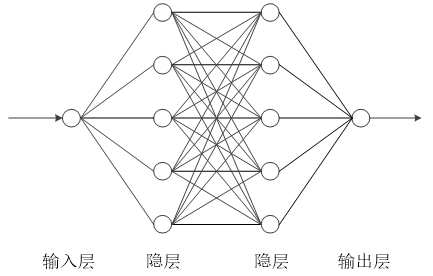

#### 采用keras.Sequential方法（顺序式方法）构建神经网络结构

In [33]:
import tensorflow.keras as keras
# 创建一个顺序模型，一系列层的线性堆叠
tf_model = keras.Sequential([
    # 第一个全连接层，有5个神经元，激活函数为 sigmoid，一维的输入。权重初始化为均匀分布的随机值，偏置初始化为零
    keras.layers.Dense(5, activation='sigmoid', input_shape=(1,),kernel_initializer='random_uniform', bias_initializer='zeros'),
    #第二个全连接层，与前一个全连接层相连。它也有 5 个神经元，激活函数为 sigmoid
    keras.layers.Dense(5, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros'),
    #第三个全连接层，与前一个全连接层相连。它有一个神经元（只有一个输出），激活函数为 sigmoid
    keras.layers.Dense(1, activation='sigmoid',kernel_initializer='random_uniform', bias_initializer='zeros')
])


#### 采用keras.Model方法（函数式方法）构建神经网络结构

In [34]:
import tensorflow as tf
# 创建输入数据
inputs = tf.keras.Input(shape=(1,))

# 使用Dense层
x1  = tf.keras.layers.Dense(5, activation='sigmoid')(inputs)
x2 = tf.keras.layers.Dense(5, activation='sigmoid')(x1)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x2)

# 使用函数式构建模型
tf_model = tf.keras.Model(inputs= inputs, outputs=predictions)

#### 编译模型，配置优化器、损失函数等

In [37]:
# 编译模型，指定随机梯度下降 (SGD) 优化器，学习率为 0.01，损失函数为均方误差
tf_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='mean_squared_error')

#### 3.训练模型
#### (3)对构建好的神经模型进行训练（设置迭代次数、批次大小等）

In [38]:
# 使用TensorFlow 2 中的 Keras 模块来训练神经网络模型
tf_epoch = 1000   # 迭代次数
batch_size = 5 # 每批训练样本数（批梯度下降法）
#使用训练数据X和标签y1来训练模型。batch_size指定每次迭代训练所使用的样本数量，verbose 设置为 1 则输出进度条，设置为 0 则不输出。
tf_model.fit(x_train, y_train_s, batch_size=batch_size, epochs=tf_epoch, verbose=1)  #batch_size: 批次大小。这表示每次迭代时模型将处理多少个样本。
tf_model.summary()  # 输出模型的概要信息，包括模型的结构、参数数量等。

Epoch 1/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1479
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1467
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1455
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1444
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1432
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1420
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1409
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1397
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1386
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1374
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1363
Epoch 12/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1352
Epoch 13/1000
6/6 [==============================

 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10     第一层  5 个权重 + 5 个偏置 
                                                                 
 dense_1 (Dense)             (None, 5)                 30     第二层 5*5个权重+1个偏置  
                                                                 
 dense_2 (Dense)             (None, 1)                 6     第三层  5个权重+1个偏置

#### (4) 用matplotlib画出预测的拟合曲线图和原始函数图，观察并记录训练完成的模型在训练集和测试集上的MSE值

4/4 [==============================] - 0s 2ms/step


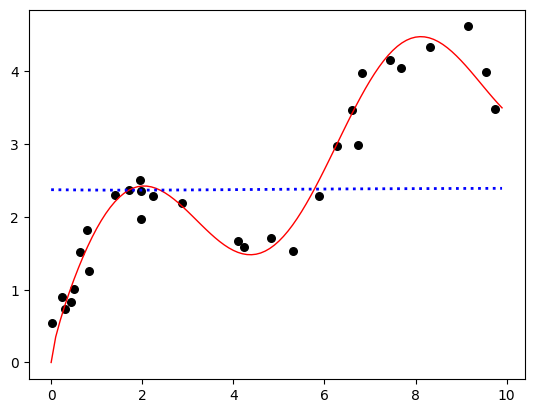

输出训练集的MSE: 1.3349545
输出测试集的MSE 1.3850621972079449


In [44]:
pred_y_test = tf_model.predict(x_test)  #TensorFlow模型对输入数据xx进行预测
for i in range(len(pred_y_test)): # 对验证样本的预测标签值进行反归一化
    pred_y_test[i] = miny + pred_y_test[i] * step  #可以将归一化后的值转换回原始范围
pred_y_test = pred_y_test.reshape(-1)

plt.scatter(x_train, y_train, color="black", s=30)  #散点图绘制原始数据点
plt.plot(x_test, y_test, color="red", linewidth=1, linestyle='-') #拟合非线性函数曲线
plt.plot(x_test, pred_y_test, color="blue", linewidth=2, linestyle=':')  #神经网络模型拟合曲线
plt.show()

from sklearn.metrics import mean_squared_error
#print("输出训练集的MSE:",mean_squared_error(y_train, pred_y_train))   #输出训练集的MSE
print("输出测试集的MSE",mean_squared_error(y_test,pred_y_test))   #输出测试集的MSE

### 改用adam优化器，查看结果变化

In [45]:
# 改用adam优化器
tf_epoch = 1000
tf_model.compile(optimizer='adam', loss='mean_squared_error')   #Adam优化器来更新模型的权重
tf_model.fit(x_train, y_train_s, batch_size=batch_size, epochs=tf_epoch, verbose=1)

Epoch 1/1000
6/6 [==============================] - 1s 2ms/step - loss: 0.0805
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0804
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0799
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0798
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0797
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0796
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0795
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0795
Epoch 12/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0794
Epoch 13/1000
6/6 [==============================

4/4 [==============================] - 0s 2ms/step


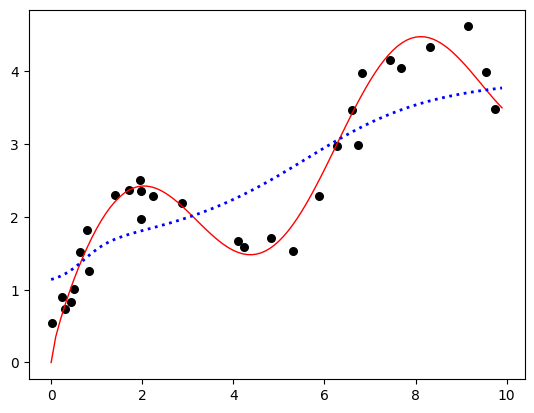

输出训练集的MSE: 1.3349545
输出测试集的MSE 0.35571178306168094


In [46]:
pred_y_test = tf_model.predict(x_test)  #TensorFlow模型对输入数据xx进行预测
for i in range(len(pred_y_test)): # 对验证样本的预测标签值进行反归一化
    pred_y_test[i] = miny + pred_y_test[i] * step  #可以将归一化后的值转换回原始范围
pred_y_test = pred_y_test.reshape(-1)

plt.scatter(x_train, y_train, color="black", s=30)  #散点图绘制原始数据点
plt.plot(x_test, y_test, color="red", linewidth=1, linestyle='-') #拟合非线性函数曲线
plt.plot(x_test, pred_y_test, color="blue", linewidth=2, linestyle=':')  #神经网络模型拟合曲线
plt.show()

from sklearn.metrics import mean_squared_error
#print("输出训练集的MSE:",mean_squared_error(y_train, pred_y_train))   #输出训练集的MSE
print("输出测试集的MSE",mean_squared_error(y_test,pred_y_test))   #输出测试集的MSE

### 修改神经网络结构，查看结果变化

In [48]:
import tensorflow.keras as keras
# 创建一个顺序模型，一系列层的线性堆叠
tf_model = keras.Sequential([
    keras.layers.Dense(5, activation='sigmoid', input_shape=(1,),kernel_initializer='random_uniform', bias_initializer='zeros'),
    keras.layers.Dense(5, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros'),
    keras.layers.Dense(5, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='zeros'),
    keras.layers.Dense(1, activation='sigmoid',kernel_initializer='random_uniform', bias_initializer='zeros')
])

In [51]:
# 改用adam优化器
tf_model.compile(optimizer='adam', loss='mean_squared_error')   #Adam优化器来更新模型的权重
tf_model.fit(x_train, y_train_s, batch_size=batch_size, epochs=tf_epoch, verbose=1)
tf_model.summary()  # 输出模型的概要信息，包括模型的结构、参数数量等。

Epoch 1/1000
6/6 [==============================] - 1s 2ms/step - loss: 0.0814
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0813
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0813
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 12/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0813
Epoch 13/1000
6/6 [==============================

4/4 [==============================] - 0s 2ms/step


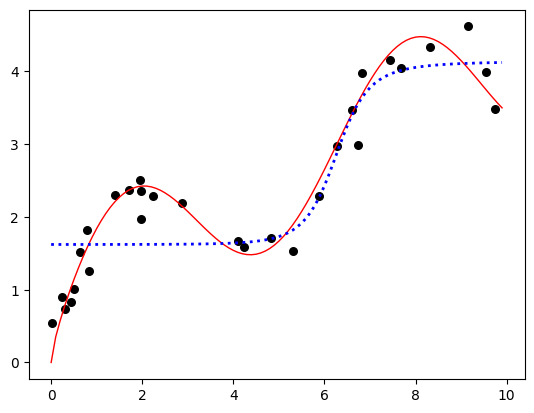

输出训练集的MSE: 1.3349545
输出测试集的MSE 0.19875535297179664


In [52]:
pred_y_test = tf_model.predict(x_test)  #TensorFlow模型对输入数据xx进行预测
for i in range(len(pred_y_test)): # 对验证样本的预测标签值进行反归一化
    pred_y_test[i] = miny + pred_y_test[i] * step  #可以将归一化后的值转换回原始范围
pred_y_test = pred_y_test.reshape(-1)

plt.scatter(x_train, y_train, color="black", s=30)  #散点图绘制原始数据点
plt.plot(x_test, y_test, color="red", linewidth=1, linestyle='-') #拟合非线性函数曲线
plt.plot(x_test, pred_y_test, color="blue", linewidth=2, linestyle=':')  #神经网络模型拟合曲线
plt.show()

from sklearn.metrics import mean_squared_error
#print("输出训练集的MSE:",mean_squared_error(y_train, pred_y_train))   #输出训练集的MSE
print("输出测试集的MSE",mean_squared_error(y_test,pred_y_test))   #输出测试集的MSE